In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cols = ['Date', 'Open', 'High', 'Low', 'Close', 'Change_percentage',
       'Shares_traded', 'Turnover_in_crore']

In [12]:
nifty50 = pd.read_csv("E:/Study/Data Analysis/Budget Analysis/Nifty_50.csv", parse_dates=["Date"], index_col="Date", names = cols, header = 0)

In [13]:
nifty50

,Open,High,Low,Close,Change_percentage,Shares_traded,Turnover_in_crore
Date,,,,,,,
2015-01-01,8272.80,8294.70,8248.75,8284.00,0.14%,56560411.0,2321.88
2015-01-02,8288.70,8410.60,8288.70,8395.45,1.29%,101887024.0,4715.72
2015-01-05,8407.95,8445.60,8363.90,8378.40,-0.35%,118160545.0,5525.52
2015-01-06,8325.30,8327.85,8111.35,8127.35,-2.38%,172799618.0,8089.19
2015-01-07,8118.65,8151.20,8065.45,8102.10,-0.20%,164075424.0,7464.33
...,...,...,...,...,...,...,...
2025-01-27,22940.15,23007.45,22786.90,22829.15,-0.48%,257372790.0,24202.41
2025-01-28,22960.45,23137.95,22857.65,22957.25,-0.01%,361868609.0,33221.80
2025-01-29,23026.75,23183.35,22976.50,23163.10,0.59%,251208119.0,22307.38


In [16]:
nifty50.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2500 entries, 2015-01-01 to 2025-01-31
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Open               2500 non-null   float64
 1   High               2500 non-null   float64
 2   Low                2500 non-null   float64
 3   Close              2500 non-null   float64
 4   Change_percentage  2500 non-null   object 
 5   Shares_traded      2498 non-null   float64
 6   Turnover_in_crore  2498 non-null   float64
dtypes: float64(6), object(1)
memory usage: 156.2+ KB


In [17]:
nifty50.describe()

,Open,High,Low,Close,Shares_traded,Turnover_in_crore
count,2500.000000,2500.000000,2500.000000,2500.000000,2.498000e+03,2498.000000
mean,13600.470940,13662.488040,13515.021780,13590.097940,3.277505e+08,19913.696930
std,5036.307563,5055.018345,5013.598096,5035.175583,1.901271e+08,10913.470555
min,7023.650000,7034.200000,6825.800000,6970.600000,1.661087e+07,805.890000
25%,9390.100000,9446.012500,9323.100000,9375.812500,2.016145e+08,10362.082500
50%,11563.150000,11599.050000,11487.600000,11552.125000,2.661751e+08,18724.140000
75%,17594.987500,17667.937500,17478.412500,17590.787500,3.891449e+08,26628.535000
max,26248.250000,26277.350000,26151.400000,26216.050000,1.811564e+09,93786.440000


In [18]:
budget_dates = pd.to_datetime([
    "2015-02-01", "2016-02-01", "2017-02-01", "2018-02-01", "2019-02-01",
    "2020-02-01", "2021-02-01", "2022-02-01", "2023-02-01", "2024-02-01",
    "2025-02-01"
])

In [20]:
nifty50["Change_percentage"] = nifty50["Change_percentage"].str.rstrip("%").astype(float)

In [21]:
windows = {
    "1-Day": 1,
    "1-Week": 5,
    "1-Month": 20
}

# Store results
results = []

for budget_date in budget_dates:
    for window_name, window_size in windows.items():
        pre_data = nifty50[(nifty50.index < budget_date) & 
                           (nifty50.index >= budget_date - pd.Timedelta(days=window_size))]
        
        post_data = nifty50[(nifty50.index > budget_date) & 
                            (nifty50.index <= budget_date + pd.Timedelta(days=window_size))]
        
        pre_avg = pre_data["Change_percentage"].mean()
        post_avg = post_data["Change_percentage"].mean()
        
        results.append({
            "Budget_Date": budget_date,
            "Window": window_name,
            "Pre_Budget_Avg": pre_avg,
            "Post_Budget_Avg": post_avg
        })

results_df = pd.DataFrame(results)

In [23]:
results_df

,Budget_Date,Window,Pre_Budget_Avg,Post_Budget_Avg
0,2015-02-01,1-Day,NaN,-0.060000
1,2015-02-01,1-Week,-0.237500,-0.442000
2,2015-02-01,1-Month,0.089286,-0.043571
3,2016-02-01,1-Day,NaN,-1.470000
4,2016-02-01,1-Week,0.526667,-0.255000
5,2016-02-01,1-Month,-0.140000,-0.432857
6,2017-02-01,1-Day,-0.790000,0.110000
7,2017-02-01,1-Week,-0.153333,0.120000
8,2017-02-01,1-Month,0.123077,-0.070714
9,2018-02-01,1-Day,0.080000,-1.620000


In [26]:
summary_df = results_df.groupby("Window").agg({
    "Pre_Budget_Avg": "mean",
    "Post_Budget_Avg": "mean"
}).reset_index()

summary_df.columns = ["Window", "Avg_Pre", "Avg_Post"]

print(summary_df)

    Window   Avg_Pre  Avg_Post
0    1-Day  0.163750 -0.093750
1  1-Month -0.124384 -0.100863
2   1-Week -0.161076  0.142883


In [27]:
# Define the desired order
window_order = ["1-Day", "1-Week", "1-Month"]

# Convert the 'Window' column to a categorical type with the specified order
results_df["Window"] = pd.Categorical(results_df["Window"], categories=window_order, ordered=True)

In [28]:
# Group by window and calculate average pre- and post-budget performance
summary_df = results_df.groupby("Window", observed=True).agg({
    "Pre_Budget_Avg": "mean",  # Only calculate mean for pre-budget
    "Post_Budget_Avg": "mean"  # Only calculate mean for post-budget
}).reset_index()

# Rename columns for clarity
summary_df.columns = ["Window", "Avg_Pre", "Avg_Post"]

# Display summary
print(summary_df)

    Window   Avg_Pre  Avg_Post
0    1-Day  0.163750 -0.093750
1   1-Week -0.161076  0.142883
2  1-Month -0.124384 -0.100863


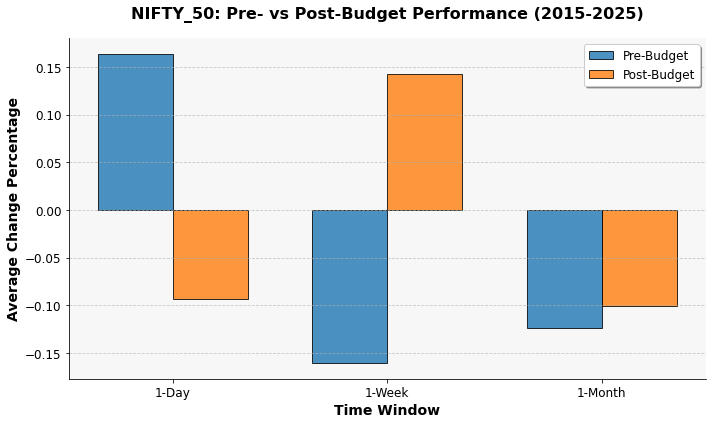

In [43]:
# Plot average pre- and post-budget performance
plt.figure(figsize=(10, 6))
x = np.arange(len(summary_df))
width = 0.35

# Aesthetic colors
pre_budget_color = "#1f77b4"  # Soft blue
post_budget_color = "#ff7f0e"  # Soft orange

plt.bar(x - width/2, summary_df["Avg_Pre"], width, label="Pre-Budget", color=pre_budget_color, edgecolor="black", alpha=0.8)
plt.bar(x + width/2, summary_df["Avg_Post"], width, label="Post-Budget", color=post_budget_color, edgecolor="black", alpha=0.8)

# Customizing the plot
plt.xticks(x, summary_df["Window"], fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Time Window", fontsize=14, fontweight="bold")
plt.ylabel("Average Change Percentage", fontsize=14, fontweight="bold")
plt.title("NIFTY_50: Pre- vs Post-Budget Performance (2015-2025)", fontsize=16, fontweight="bold", pad=20)
plt.legend(fontsize=12, frameon=True, shadow=True, loc="upper right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Adding a light background for better aesthetics
plt.gca().set_facecolor("#f7f7f7")

# Remove top and right spines for a cleaner look
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.tight_layout()
plt.show()